In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

In [ ]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

In [ ]:
print(df.describe())

In [ ]:
iris.target_names

In [ ]:
# Check for missing values
print(df.isnull().sum())

In [ ]:
iris.target.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['target'] = iris.target
sns.pairplot(df,hue='target')
plt.show()

# Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

In [ ]:
X = df['petal length (cm)'].values
y = df['petal width (cm)'].values

In [ ]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
plt.scatter(X_train, y_train)
plt.show()

In [3]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X_train)) # Number of elements in X

# Performing Gradient Descent 
losses = []
for i in range(epochs): 
    y_pred = m*X_train + c  # The current predicted value of Y

    residuals = y_train - y_pred
    loss = np.sum(residuals ** 2)
    losses.append(loss)
    D_m = (-2/n) * sum(X_train * residuals)  # Derivative wrt m
    D_c = (-2/n) * sum(residuals)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    if i % 100 == 0:
        print(np.mean(y_train-y_pred))
    

NameError: name 'y_train' is not defined

In [ ]:
# Visualize the loss
plt.plot(losses)

In [ ]:
# Run the model on the test set
pred = []
for X in X_test:
    y_pred = m*X + c
    pred.append(y_pred)
print(pred)
print(y_test)

In [ ]:
# Calculate the Mean Absolue Error
print("Mean Absolute Error:", np.mean(np.abs(y_pred - y_test)))

# Calculate the Mean Squared Error
print("Mean Squared Error:", np.mean((y_pred - y_test)**2))


In [ ]:
# Making predictions
y_pred = m*X_test + c

plt.scatter(X_test, y_test)
plt.plot([min(X_test), max(X_test)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.show()

In [ ]:
'''
Your task:

Create a LinearRegression class
(Use the OOP Skeleton attached)

Use the class to train and evaluate
a model in the following columns of iris dataset:
# X petal width
# y sepal length

'''

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

from LinearRegressionSkeleton import LinearRegression


# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df['petal width (cm)'].values
y = df['sepal length (cm)'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linReg = LinearRegression(epochs=1000, lr=0.01)
linReg.fit(X_train, Y_train)
#linReg.predict(X_test)
linReg.evaluate(X_test, Y_test)


5.809166666666666
0.40725315559545744
0.2589972656637533
0.17222031154597167
0.11454491447705524
0.0761847035725535
0.050671032593381446
0.03370169369652266
0.022415255815467452
0.01490855913050418
(30,) (30,)
Mean Absolute Error: 0.27839296733704516
Mean Squared Error: 0.16735511597970598


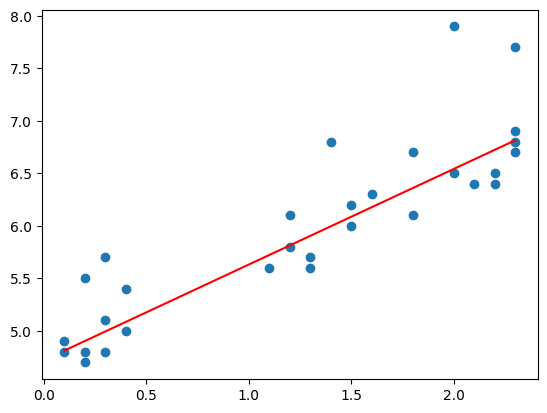

In [2]:
Y_pred = linReg.predict(X_test)

plt.scatter(X_test, Y_test)
plt.plot([min(X_test), max(X_test)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()